Iteration 0, Centroids: [[0.07349112 0.07416731]
 [0.05971248 0.05933782]]
Iteration 1, Centroids: [[0.04871147 0.04966516]
 [0.0027274  0.0025305 ]]
Iteration 2, Centroids: [[ 1.77900772e-01  1.43888076e-01]
 [-3.86831216e-05 -3.83380359e-05]]
Iteration 3, Centroids: [[ 1.36385274e+00  1.24426006e+00]
 [-7.77673547e-60 -7.77263652e-60]]
Iteration 4, Centroids: [[2.03174718 1.95417348]
 [0.         0.        ]]
Iteration 5, Centroids: [[2.06338691 2.2370741 ]
 [0.         0.        ]]
Iteration 6, Centroids: [[2.09078045 2.38190076]
 [0.         0.        ]]
Iteration 7, Centroids: [[2.10142329 2.44630126]
 [0.         0.        ]]
Iteration 8, Centroids: [[2.09649663 2.46234778]
 [0.         0.        ]]
Iteration 9, Centroids: [[2.09470329 2.46587451]
 [0.         0.        ]]
Iteration 10, Centroids: [[2.09431292 2.46657467]
 [0.         0.        ]]
Iteration 11, Centroids: [[2.09423624 2.46670934]
 [0.         0.        ]]
Converged at iteration 12


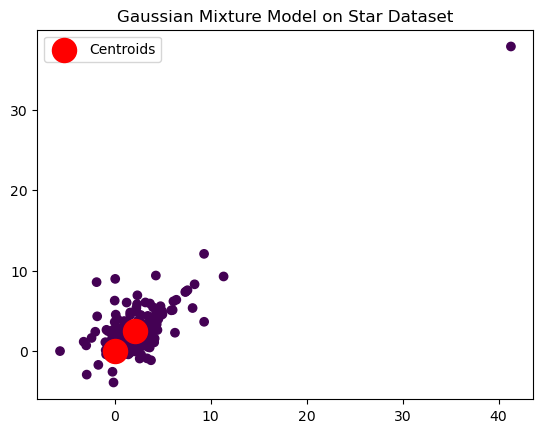

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_sdss_corrected_spectra

# Load the star data from astroML
data = fetch_sdss_corrected_spectra()
X = data['spectra'][:, :2]
# Gaussian Mixture Model (GMM) implementation
class GMM:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.epsilon = 1e-8  # Small constant to avoid division by zero and singular matrices

    def _initialize_params(self, X):
        np.random.seed(42)
        self.means = X[np.random.choice(X.shape[0], self.k, replace=False)]
    # Add randomness to the initial covariances
        self.covariances = [np.cov(X.T) + np.eye(X.shape[1]) * np.random.rand() * 0.1 for _ in range(self.k)]
        self.pi = np.ones(self.k) / self.k


    def _gaussian_pdf(self, X, mean, cov):
        n = X.shape[1]
        cov_inv = np.linalg.inv(cov + self.epsilon * np.eye(cov.shape[0]))  # Regularization
        diff = X - mean
        exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
        return np.exp(-0.5 * exponent) / np.sqrt((2 * np.pi) ** n * (np.linalg.det(cov) + self.epsilon))  # Regularize det

    def _e_step(self, X):
        likelihoods = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
            likelihoods[:, i] = self.pi[i] * self._gaussian_pdf(X, self.means[i], self.covariances[i])
        responsibilities = likelihoods / (likelihoods.sum(axis=1, keepdims=True) + self.epsilon)  # Avoid div by zero
        return responsibilities

    def _m_step(self, X, responsibilities):
        N_k = responsibilities.sum(axis=0)
        self.means = np.dot(responsibilities.T, X) / N_k[:, np.newaxis]
        self.pi = N_k / X.shape[0]

        for i in range(self.k):
            diff = X - self.means[i]
            self.covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / N_k[i] + self.epsilon * np.eye(X.shape[1])

    def fit(self, X):
        self._initialize_params(X)
        for i in range(self.max_iters):
            old_means = self.means.copy()
            responsibilities = self._e_step(X)
            self._m_step(X, responsibilities)
            if np.all(np.linalg.norm(self.means - old_means, axis=1) < self.tol):
                print(f"Converged at iteration {i}")
                break
            print(f"Iteration {i}, Centroids: {self.means}")


    def predict(self, X):
        responsibilities = self._e_step(X)
        return np.argmax(responsibilities, axis=1)


# Initialize and fit the GMM
gmm = GMM(k=2)
gmm.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis')
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], s=300, c='red', label='Centroids')
plt.title('Gaussian Mixture Model on Star Dataset')
plt.legend()
plt.show()


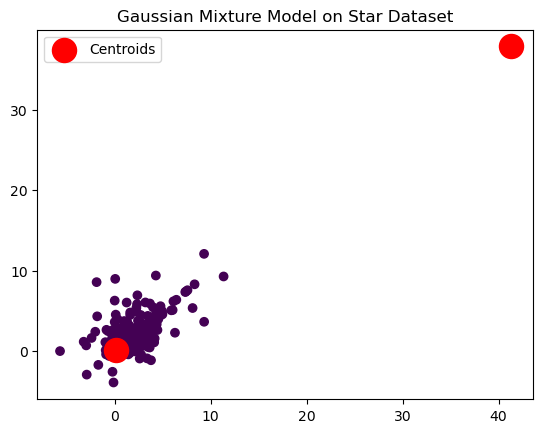

In [3]:
from sklearn.mixture import GaussianMixture

# Initialize and fit the GMM
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red', label='Centroids')
plt.title('Gaussian Mixture Model on Star Dataset')
plt.legend()
plt.show()


In [2]:
import os

# Path to the dataset file (replace with your actual file path)
file_path = 'C:\\Users\\Machine-Learning\\astroML_data\\spec4000.npz'

# Check if the file exists before attempting to delete
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been deleted.")
else:
    print(f"File {file_path} does not exist.")



File C:\Users\Machine-Learning\astroML_data\spec4000.npz has been deleted.
